In [34]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Import Data
data = pd.read_csv('SampleData.csv')
# Create Pivot
AST = pd.pivot_table(data, 
                    values=['MTD', '3M', '6M', 'YTD'], 
                    index=['strategy_classification'], 
                    aggfunc=np.mean
                    )
#Sort Alphabetically by strategy_classification
AST['labels'] = AST.index.str.lower()
AST = AST.sort_values('labels').drop('labels', axis=1)
#Re-order Columns
AST = AST[['MTD', 'YTD']]
#multiply 100
AST.loc[:,'MTD'] *= 100
AST.loc[:,'YTD'] *= 100
AST

,MTD,YTD
strategy_classification,,
Commodity,0.2946,1.0080
CTA,0.2445,-1.8021
Equity Market Neutral,0.1545,-0.8119
Fixed Income,0.8062,2.3878
Quant Macro,0.3969,-1.0359
Volatility,-0.1244,-0.8836


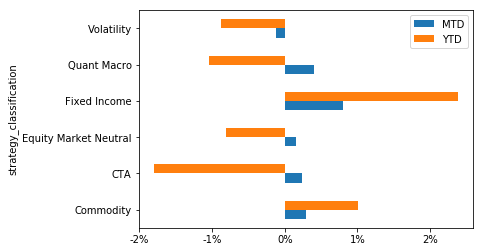

In [41]:
from matplotlib.ticker import FuncFormatter
ax = AST.plot(kind='barh')
formatter = FuncFormatter(lambda x, pos: "%d%%" % (x))
ax.xaxis.set_major_formatter(formatter)